# 유럽 노트북 판매량 데이터 분석

In [ ]:
# # 업글하고 런타임 재시작 했을 때 유니코드 에러 뜨면
!pip install pandas-profiling==3.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


In [ ]:
# !pip install matplotlib --upgrade
# # # 코랩은 프로파일링 업글 해줘야함
# # # 업글하고 런타임 재시작 했을 때 유니코드 에러 뜨면
# !pip install markupsafe==2.0.1 #이거 설치후 런타임 재시작 후 하면 됨 


In [ ]:
#!pip install markupsafe==2.0.1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.core.dtypes.common import is_numeric_dtype
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# !pip install matplotlib --upgrade

# # 코랩은 프로파일링 업글 해줘야함
# # 업글하고 런타임 재시작 했을 때 유니코드 에러 뜨면
# !pip install markupsafe==2.0.1 #이거 설치후 런타임 재시작 후 하면 됨 
# !pip install pandas-profiling==3.2.0

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jinhyukbae/data_test/main/EU_NB/global_laptop_selling_data.csv')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [ ]:
df.describe(include='O')

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,106,9,179
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,282,1072,121


In [ ]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [ ]:
df.drop('laptop_ID',axis=1,inplace=True)
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df_org = df.copy()

In [ ]:
df = df_org.copy()

## 노트북 회사별 가격

In [ ]:
# 노트북 회사별 판매량 
df_product_price = df.groupby("Company")["Price_euros"].mean()


In [ ]:
#df[df_product_price]

In [ ]:
df_product_price = pd.DataFrame(data = df_product_price)

In [ ]:
df_product_price

,Price_euros
Company,
Acer,626.775825
Apple,1564.198571
Asus,1104.169367
Chuwi,314.296667
Dell,1186.068990
Fujitsu,729.000000
Google,1677.666667
HP,1067.774854
Huawei,1424.000000


In [ ]:
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)

In [ ]:
df_product_price

,Product Avg Price
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500


<AxesSubplot: xlabel='Company', ylabel='Product Avg Price'>

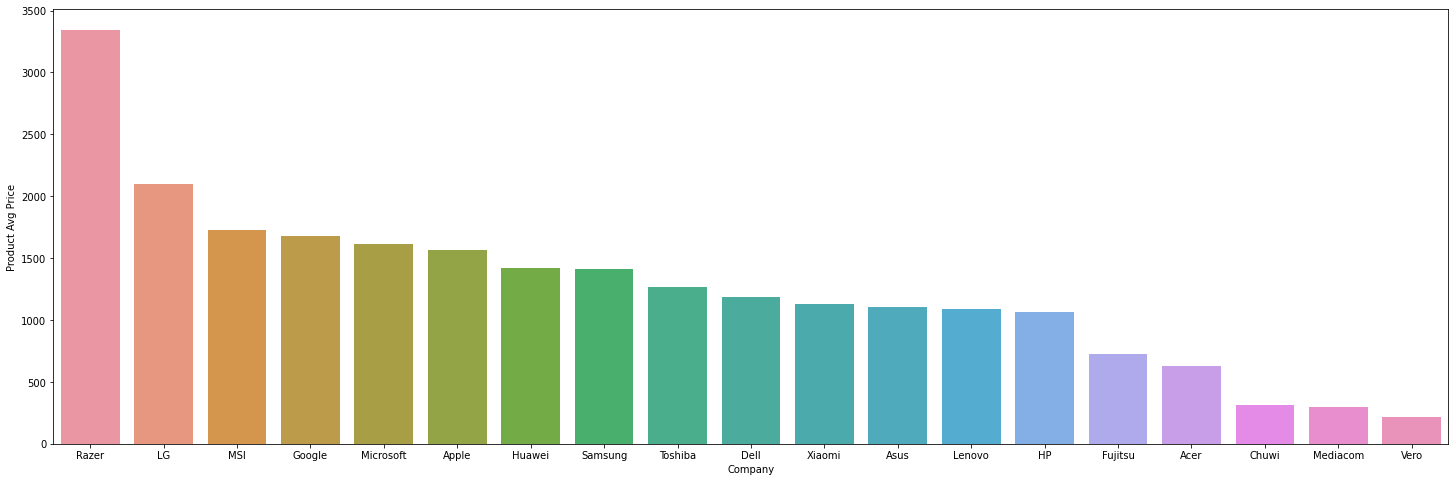

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(data=df_product_price, x=df_product_price.index, y='Product Avg Price')

* Razer Msi는 고사양 게이밍용 노트북이라 비싼듯
* LG ??

In [ ]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

## 노트북 기종별 가격

In [ ]:
# 노트북 기종별 가격
df_productType_wise_price = df.groupby('TypeName')['Price_euros'].mean()

In [ ]:
df_productType_wise_price = pd.DataFrame(data=df_productType_wise_price)

In [ ]:
df_productType_wise_price.columns = ["Product Price"]

In [ ]:
df_productType_wise_price.sort_values(by="Product Price",ascending=False,inplace=True)

In [ ]:
df_productType_wise_price

,Product Price
TypeName,
Workstation,2280.358966
Gaming,1731.380634
Ultrabook,1548.230357
2 in 1 Convertible,1282.401653
Notebook,782.078624
Netbook,636.232000


<AxesSubplot: xlabel='TypeName', ylabel='Product Price'>

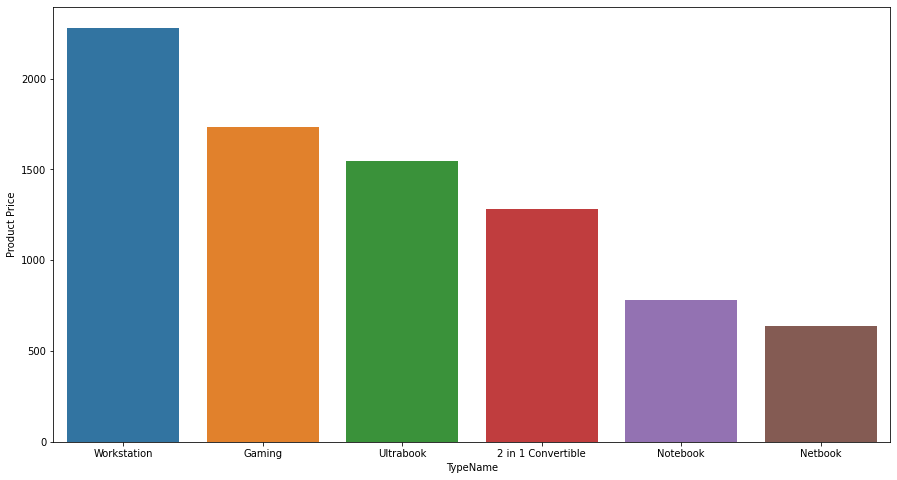

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_productType_wise_price,x=df_productType_wise_price.index,y="Product Price")

* workstation 워크스테이션은 주로 과학기술 연산, 공학 설계, 통계 처리, 금융 자료 분석, 컴퓨터 그래픽스 등 전문 분야의 작업을 염두에 둔 고성능 개인용 컴퓨터
* 2 in 1 은 태블릿+노트북 같은 기종  

In [ ]:
df.shape

(1303, 12)

In [ ]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
df.head().T

,0,1,2,3,4
Company,Apple,Apple,HP,Apple,Apple
Product,MacBook Pro,Macbook Air,250 G6,MacBook Pro,MacBook Pro
TypeName,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook
Inches,13.3,13.3,15.6,15.4,13.3
ScreenResolution,IPS Panel Retina Display 2560x1600,1440x900,Full HD 1920x1080,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display 2560x1600
Cpu,Intel Core i5 2.3GHz,Intel Core i5 1.8GHz,Intel Core i5 7200U 2.5GHz,Intel Core i7 2.7GHz,Intel Core i5 3.1GHz
Ram,8GB,8GB,8GB,16GB,8GB
Memory,128GB SSD,128GB Flash Storage,256GB SSD,512GB SSD,256GB SSD
Gpu,Intel Iris Plus Graphics 640,Intel HD Graphics 6000,Intel HD Graphics 620,AMD Radeon Pro 455,Intel Iris Plus Graphics 650
OpSys,macOS,macOS,No OS,macOS,macOS


In [ ]:
X=df.drop(df[['Price_euros']],axis=1) #독립변수 

In [ ]:
X.info() # 범주형 변수 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [ ]:
y=df[['Price_euros']]

In [ ]:
y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


## 인코딩 범주형 변수를 숫자로
* 라벨 인코딩 쓸 거

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in X.columns:
  if is_numeric_dtype(X[col]): #is_numeric_dtype 타입이 int float bool 이면 True / X[col]이 True 면 ~
    continue
  else: # 아니면
    X[col] =le.fit_transform(X[col]) # 라벨인코더(범주형 변수를 숫자로 바꾸는 거)로 바꿔줌 fit_transform
X.head()    

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,300,4,13.3,23,65,8,4,56,8,38
1,1,301,4,13.3,1,63,8,2,50,8,35
2,7,50,3,15.6,8,74,8,16,52,4,74
3,1,300,4,15.4,25,85,1,29,8,8,71
4,1,300,4,13.3,23,67,8,16,57,8,38


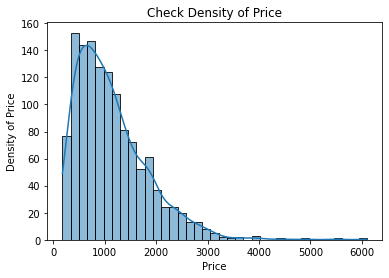

In [ ]:
ax = sns.histplot(y['Price_euros'],kde=True)
ax.set_xlabel("Price")
ax.set_ylabel("Density of Price")
ax.set_title("Check Density of Price")
plt.show()

# 500~1500 달러 인 노트북이 많음 

<AxesSubplot: >

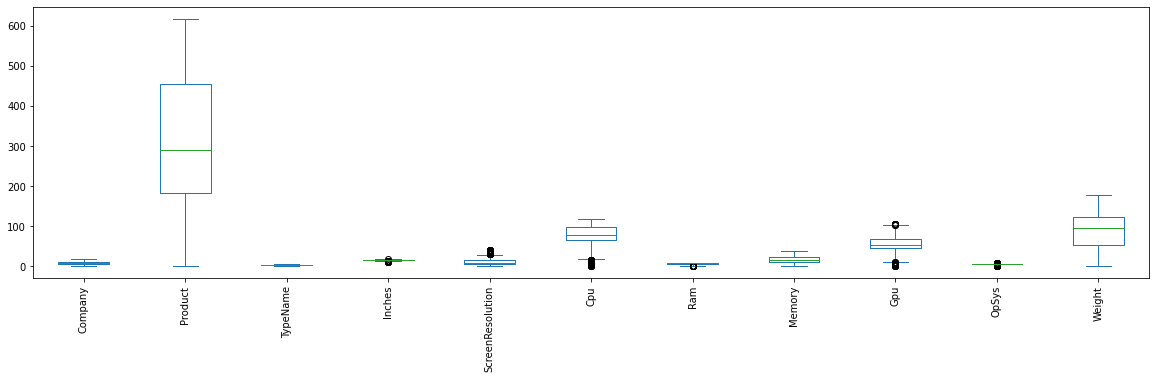

In [ ]:
X.plot.box(figsize=(20,5),rot=90)

In [ ]:
# sns.pairplot(X) 너무 오래 걸림 ㅈㅅ

<AxesSubplot: >

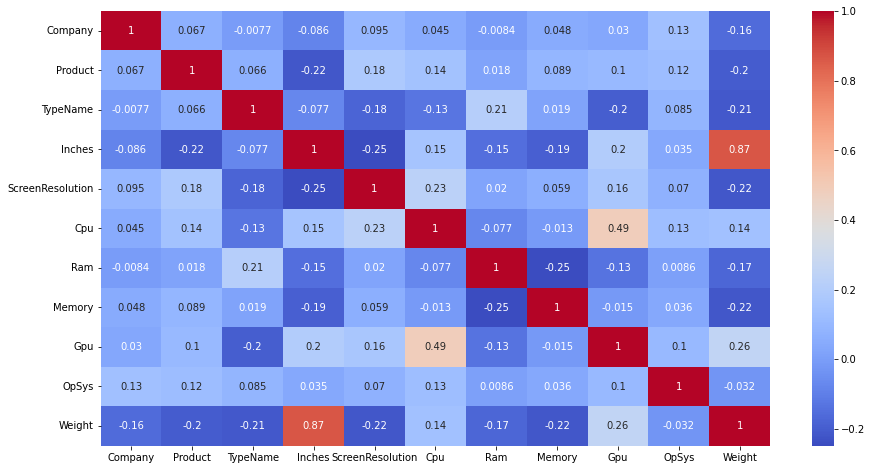

In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(15,8))
sns.heatmap(data=X.corr(),annot=True,cmap='coolwarm')



## 프로파일링

In [ ]:
profile = ProfileReport(X, title = 'Laptop Selling Data Analysis',correlations = None, interactions = None, html = {'style':{'full_width' : True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 전처리 안하고 모델링

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [ ]:
X_train.shape

(912, 11)

In [ ]:
X_test.shape

(391, 11)

## 선형회귀



In [ ]:
from sklearn.linear_model import LinearRegression
lereg=LinearRegression()

In [ ]:
lereg.fit(X_train,y_train)

LinearRegression()

In [ ]:
LePredict = lereg.predict(X_test)

### 평가 mse mae r2

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
LR_mse = mean_squared_error(y_test,LePredict) #실제값,예측값
LR_mae = mean_absolute_error(y_test,LePredict) #실제값,예측값
LR_r2 = r2_score(y_test,LePredict) #실제값,예측값
print("mse",LR_mse)
print("mae",LR_mae)
print("r2score",LR_r2)

mse 295411.06637463707
mae 406.81182289833737
r2score 0.4276606273989245


In [ ]:
lereg_training_score=lereg.score(X_train,y_train) # 훈련한 데이터로만 점수내봄
lereg_training_score

0.49325971456362616

In [ ]:
lereg_testing_score=lereg.score(X_test,y_test) # 
lereg_testing_score

0.4276606273989245

## KNN 최근접이웃

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_pred=knn.predict(X_test)

In [ ]:
knn_mse = mean_squared_error(y_test,knn_pred) #진짜값 knn모델을 쓴 예측값
knn_mae = mean_absolute_error(y_test,knn_pred) #진짜값 knn모델을 쓴 예측값
knn_r2 = r2_score(y_test,knn_pred) #진짜값 knn모델을 쓴 예측값
print("mse",knn_mse)
print("mae",knn_mae)
print("r2score",knn_r2)

mse 139380.9303061097
mae 238.0348167092924
r2score 0.7299586803468441


In [ ]:
knn_training_score = knn.score(X_train,y_train)
knn_training_score


0.8644381981706512

In [ ]:
knn_testing_score = knn.score(X_test,y_test)
knn_testing_score

0.7299586803468441

## 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor()

In [ ]:
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
RFR_pred = RFR.predict(X_test)

In [ ]:
RFR_mse = mean_squared_error(y_test,RFR_pred)
RFR_mae = mean_absolute_error(y_test,RFR_pred)
RFR_r2 = r2_score(y_test,RFR_pred)
print("mse",RFR_mse)
print("mae",RFR_mae)
print("r2_score",RFR_r2)

mse 91686.65028909809
mae 175.6421818982666
r2_score 0.8223631885346933


In [ ]:
RFR_training_score = RFR.score(X_train,y_train)
RFR_training_score

0.9736561987224105

In [ ]:
RFR_testing_score = RFR.score(X_test,y_test)
RFR_testing_score

0.8223631885346933

## 디시전트리

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=10,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0,
                              max_features=None,
                              random_state=1,
                              max_leaf_nodes=None,
                              min_impurity_decrease=0.0,
                              ccp_alpha=0)
dtree.fit(X_train,y_train)
    







DecisionTreeRegressor(ccp_alpha=0, max_depth=10, random_state=1)

In [ ]:
dtree_predict = dtree.predict(X_test)

In [ ]:
dtree_mse = mean_squared_error(y_test,dtree_predict)
dtree_mae = mean_absolute_error(y_test,dtree_predict)
dtree_r2 = r2_score(y_test,dtree_predict)
print("mse",dtree_mse)
print("mae",dtree_mae)
print("r2_score",dtree_r2)

mse 195335.7146829279
mae 253.6497244082106
r2_score 0.6215499921508416


In [ ]:
dtree_training_score = dtree.score(X_train,y_train)
dtree_training_score

0.95828263180308

In [ ]:
dtree_testing_score = dtree.score(X_test,y_test)
dtree_testing_score

0.6215499921508416

## 서포트 벡터 

In [ ]:
from sklearn.svm import SVR

svr_lr=SVR(kernel='linear',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=True,
    max_iter=-1)

svr_lr.fit(X_train,y_train)
svr_pred = svr_lr.predict(X_test)

[LibSVM]

In [ ]:
svr_mse = mean_squared_error(y_test,svr_pred)
svr_mae = mean_absolute_error(y_test,svr_pred)
svr_r2 = r2_score(y_test,svr_pred)
print("mse",svr_mse)
print("mae",svr_mae)
print("r2_score",svr_r2)
svr_training_score = svr_lr.score(X_train,y_train)
print("svr_training_score",svr_training_score) 
svr_test_score = svr_lr.score(X_test,y_test)
print("svr_testing_score",svr_test_score)

mse 326181.11436246074
mae 400.060378378253
r2_score 0.368045697679528
svr_training_score 0.45572186834393436
svr_testing_score 0.368045697679528


## 라쏘

In [ ]:
from sklearn import linear_model

lassoreg = linear_model.Lasso(alpha=0.1)
lassoreg.fit(X_train,y_train)
lassoreg_predict = lassoreg.predict(X_test)



In [ ]:
lassoreg_mse = mean_squared_error(y_test,lassoreg_predict)
lassoreg_mae = mean_absolute_error(y_test,lassoreg_predict)
lassoreg_r2 = r2_score(y_test,lassoreg_predict)
lassoreg_training_score = lassoreg.score(X_train,y_train)
lassoreg_testing_score = lassoreg.score(X_test,y_test)
print("mse",lassoreg_mse)
print("mae",lassoreg_mae)
print("r2score",lassoreg_r2)
print("lassoreg_training_score",lassoreg_training_score)
print("lassoreg_testing_score",lassoreg_testing_score)

mse 295414.5880293083
mae 406.7967270787697
r2score 0.427653804426279
lassoreg_training_score 0.49325962455874006
lassoreg_testing_score 0.427653804426279


## 에이다부스트

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaBoost = AdaBoostRegressor(n_estimators=13,
                             learning_rate=1.0,
                             loss='linear',
                             random_state=1
                            
                             )

In [ ]:
adaBoost.fit(X_train,y_train)
adaBoost_predict = adaBoost.predict(X_test)

In [ ]:
adaBoost_mse = mean_squared_error(y_test,adaBoost_predict)
adaBoost_mae = mean_absolute_error(y_test,adaBoost_predict)
adaBoost_r2 = r2_score(y_test,adaBoost_predict)
adaBoost_training_score = adaBoost.score(X_train,y_train)
adaBoost_testing_score = adaBoost.score(X_test,y_test)
print("mse",adaBoost_mse)
print("mae",adaBoost_mae)
print("r2_score",adaBoost_r2)
print("adaBoost_training_score",adaBoost_training_score )
print("adaBoost_testing_score",adaBoost_testing_score)

mse 177384.39222454606
mae 325.7097429711028
r2_score 0.6563294902897507
adaBoost_training_score 0.7284561201047903
adaBoost_testing_score 0.6563294902897507


## XGBoost

In [ ]:
import xgboost as xg

In [ ]:
xgb = xg.XGBRegressor(n_estimators=100,max_depth=100)

In [ ]:
xgb.fit(X_train,y_train)
xgb_predict = xgb.predict(X_test)

[11:37:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_mse = mean_squared_error(y_test,xgb_predict)
xgb_mae = mean_absolute_error(y_test,xgb_predict)
xgb_r2 = r2_score(y_test,xgb_predict)
xgb_training_score = xgb.score(X_train,y_train)
xgb_testing_score = xgb.score(X_test,y_test)
print("mse",xgb_mse)
print("mae",xgb_mae)
print("r2_score",xgb_r2)
print("xgb_training_score",xgb_training_score)
print("xgb_testing_score",xgb_testing_score)

mse 90025.14686603448
mae 167.9149454055357
r2_score 0.8255822413562446
xgb_training_score 0.9997993610631165
xgb_testing_score 0.8255822413562446


## 가우시안프로세스

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gaussianreg = GaussianProcessRegressor(kernel=kernel, normalize_y=True,random_state=1)
gaussianreg.fit(X_train,y_train)
gaussianreg_predict = gaussianreg.predict(X_test)

In [ ]:
gaussianreg_mse = mean_squared_error(y_test,gaussianreg_predict)
gaussianreg_mae = mean_absolute_error(y_test,gaussianreg_predict)
gaussianreg_r2 = r2_score(y_test,gaussianreg_predict)
gaussianreg_training_score = gaussianreg.score(X_train,y_train)
gaussianreg_testing_score = gaussianreg.score(X_test,y_test)
print("mse",gaussianreg_mse)
print("mae",gaussianreg_mae)
print("r2_score",gaussianreg_r2)
print("gaussianreg_training_score",gaussianreg_training_score)
print("gaussianreg_testing_score",gaussianreg_testing_score)


mse 295510.47246831097
mae 406.70951173770504
r2_score 0.42746803467724936
gaussianreg_training_score 0.49325074732061325
gaussianreg_testing_score 0.42746803467724936


## LGBoost

In [ ]:
import lightgbm as lgb
lgb = lgb.LGBMRegressor(n_estimators=100,max_depth=100)
lgb.fit(X_train,y_train)
lgb_predict = lgb.predict(X_test)
lgb_mse = mean_squared_error(y_test,lgb_predict)
lgb_mae = mean_absolute_error(y_test,lgb_predict)
lgb_r2 = r2_score(y_test,lgb_predict)
lgb_training_score = lgb.score(X_train,y_train)
lgb_testing_score = lgb.score(X_test,y_test)
print("mse",lgb_mse)
print("mae",lgb_mae)
print("r2_score",lgb_r2)
print("lgb_training_score",lgb_training_score)
print("lgb_testing_score",lgb_testing_score)


mse 93939.46520902868
mae 175.94707180081883
r2_score 0.817998508857378
lgb_training_score 0.9511573390271725
lgb_testing_score 0.817998508857378


## 알고리즘 점수 시각화

In [ ]:
LR_DF = pd.DataFrame({'algorithm name': ['lreg r2 score:','knn r2 score:','randomforest r2 score:','decisiontree r2 score','svr r2 score','lasso r2 score','adaboost r2 score','xgboost r2 score','gaussian r2 score','LightBoost r2 score'],
                      'Accuracy Score %': [LR_r2*100,knn_r2*100,
                                          RFR_r2*100,dtree_r2*100,
                                          svr_r2*100,lassoreg_r2*100,
                                          adaBoost_r2*100,xgb_r2*100,
                                          gaussianreg_r2*100,lgb_r2*100]})
LR_DF

,algorithm name,Accuracy Score %
0,lreg r2 score:,42.766063
1,knn r2 score:,72.995868
2,randomforest r2 score:,82.236319
3,decisiontree r2 score,62.154999
4,svr r2 score,36.804570
5,lasso r2 score,42.765380
6,adaboost r2 score,65.632949
7,xgboost r2 score,82.558224
8,gaussian r2 score,42.746803
9,LightBoost r2 score,81.799851


In [ ]:
LR_DF.sort_values(by='Accuracy Score %', ascending=False)

,algorithm name,Accuracy Score %
7,xgboost r2 score,82.558224
2,randomforest r2 score:,82.236319
9,LightBoost r2 score,81.799851
1,knn r2 score:,72.995868
6,adaboost r2 score,65.632949
3,decisiontree r2 score,62.154999
0,lreg r2 score:,42.766063
5,lasso r2 score,42.765380
8,gaussian r2 score,42.746803
4,svr r2 score,36.804570


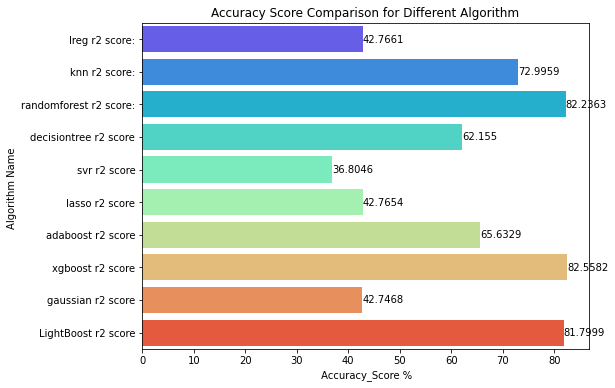

In [ ]:
#bar_label은 멧플롯립 신기능이라 업글 해줘야함 설치하고 런타임 다시시작 
#!pip install matplotlib --upgrade
plt.figure(figsize=(8,6))
ax =sns.barplot(y='algorithm name',x='Accuracy Score %',data=LR_DF,palette='rainbow')
ax.set_xlabel( " Accuracy_Score %")
ax.set_ylabel( "Algorithm Name ")
ax.set_title(  "Accuracy Score Comparison for Different Algorithm")
ax.bar_label(ax.containers[0])
plt.show()


### TOP3 
* xgboost 
* randomforest
* lightboost

## preprocessing & feature engineering

* Cpu Ram Memory Weight ScreenResolution 같은 숫자/문자 섞여있는 회생가능 한 애들을 처리해볼까 합니다.


* Gpu도 문자/숫자 지만 제외



In [ ]:
df.head().T

,0,1,2,3,4
Company,Apple,Apple,HP,Apple,Apple
Product,MacBook Pro,Macbook Air,250 G6,MacBook Pro,MacBook Pro
TypeName,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook
Inches,13.3,13.3,15.6,15.4,13.3
ScreenResolution,IPS Panel Retina Display 2560x1600,1440x900,Full HD 1920x1080,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display 2560x1600
Cpu,Intel Core i5 2.3GHz,Intel Core i5 1.8GHz,Intel Core i5 7200U 2.5GHz,Intel Core i7 2.7GHz,Intel Core i5 3.1GHz
Ram,8GB,8GB,8GB,16GB,8GB
Memory,128GB SSD,128GB Flash Storage,256GB SSD,512GB SSD,256GB SSD
Gpu,Intel Iris Plus Graphics 640,Intel HD Graphics 6000,Intel HD Graphics 620,AMD Radeon Pro 455,Intel Iris Plus Graphics 650
OpSys,macOS,macOS,No OS,macOS,macOS


In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
X = df.drop(df[['Price_euros']],axis=1)
y = df[['Price_euros']]

### Weight 처리

In [ ]:
X['Weight'] = X['Weight'].str.replace("kg","") #Weight에 문자열 kg를 삭제 시킬 거 
X['Weight'] = X['Weight'].astype('float32') # kg가 빠진 weight를 플로트로 변환 

In [ ]:
X['Weight'].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float32

### Ram 처리

In [ ]:
X['Ram'] = X['Ram'].str.replace("GB","")
X['Ram'] = X['Ram'].astype('float32') 

In [ ]:
X['Ram'].head()

0     8.0
1     8.0
2     8.0
3    16.0
4     8.0
Name: Ram, dtype: float32

### Cpu 처리

In [ ]:
X[['Cpu_core','Processor_Speed_GHz']] = X['Cpu'].str.rsplit(" ",n=1,expand=True)

In [ ]:
X["Processor_Speed_GHz"] = X["Processor_Speed_GHz"].str.replace("GHz","")

In [ ]:
X["Processor_Speed_GHz"] = X["Processor_Speed_GHz"].astype('float32')

In [ ]:
X.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,Intel Core i5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,Intel Core i5,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,Intel Core i5 7200U,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,Intel Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,Intel Core i5,3.1


### Memory 처리

In [ ]:
# 스스디 흐드드 플래시메모리
X['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [ ]:
X[['storage_size','storage_device_type']] = X['Memory'].str.split(" ",n=1,expand=True)

In [ ]:
X.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz,storage_size,storage_device_type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,Intel Core i5,2.3,128GB,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,Intel Core i5,1.8,128GB,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,Intel Core i5 7200U,2.5,256GB,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,Intel Core i7,2.7,512GB,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,Intel Core i5,3.1,256GB,SSD


In [ ]:
# 오브젝트 타입이다 바꿔줘야함
# 1tb 2tb 같은걸 1000gb 2000gb 이렇게 바꿔보자
X.storage_size.unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [ ]:
# 리스트 컴프리헨션 에 쓸 리스트 
l = list(X['storage_size'])

In [ ]:
# 여기서 l은 storage_size z컬럼을 리스트화 해서 l에 넣은 거 
storage = [float((i.replace('GB',""))) if 'GB' in i else float((i.replace("TB","")))*1000 for i in l]
# 1. l을 i에 반복해서 집어넣음 for 반복문 for i in l
# 2. GB가 i에 있다면 GB를 replace 시키고 float형태로 변환 아니면(GB가 아니라 TB라면?) TB를 replace 시키고 플로트로 변환하고 * 1000함 (1000gb=1tb)

In [ ]:
#리스트 라서 다시 데이터프레임으로 바꿔줘야함
storage_size_gb = pd.DataFrame(data=storage, columns=['storage_size_gb'])

In [ ]:
storage_size_gb # good 

,storage_size_gb
0,128.0
1,128.0
2,256.0
3,512.0
4,256.0
...,...
1298,128.0
1299,512.0
1300,64.0
1301,1000.0


In [ ]:
X['storage_size_gb'] = storage_size_gb

In [ ]:
X['storage_size_gb']
X.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz,storage_size,storage_device_type,storage_size_gb
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,Intel Core i5,2.3,128GB,SSD,128.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,Intel Core i5,1.8,128GB,Flash Storage,128.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,Intel Core i5 7200U,2.5,256GB,SSD,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,Intel Core i7,2.7,512GB,SSD,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,Intel Core i5,3.1,256GB,SSD,256.0


In [ ]:
X.drop(X[['Memory','storage_size','Cpu']],axis=1,inplace=True) # 다 썼으면 버리자 

In [ ]:
X.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz,storage_device_type,storage_size_gb
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,Intel Iris Plus Graphics 640,macOS,1.37,Intel Core i5,2.3,SSD,128.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,Intel HD Graphics 6000,macOS,1.34,Intel Core i5,1.8,Flash Storage,128.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,Intel HD Graphics 620,No OS,1.86,Intel Core i5 7200U,2.5,SSD,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,AMD Radeon Pro 455,macOS,1.83,Intel Core i7,2.7,SSD,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,Intel Iris Plus Graphics 650,macOS,1.37,Intel Core i5,3.1,SSD,256.0


### ScreenResolution 처리

In [ ]:
# 모니터 해상도는 보통 800 x 600 1920 x 1080 이러므로 x를 기점으로 잘랐음 
X[['screen','screen_resoluton_height']] = X['ScreenResolution'].str.rsplit("x",expand=True)

In [ ]:
X["screen_resoluton_height"] = X["screen_resoluton_height"].astype('float32')

In [ ]:
X.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz,storage_device_type,storage_size_gb,screen,screen_resoluton_height
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,Intel Iris Plus Graphics 640,macOS,1.37,Intel Core i5,2.3,SSD,128.0,IPS Panel Retina Display 2560,1600.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,Intel HD Graphics 6000,macOS,1.34,Intel Core i5,1.8,Flash Storage,128.0,1440,900.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,Intel HD Graphics 620,No OS,1.86,Intel Core i5 7200U,2.5,SSD,256.0,Full HD 1920,1080.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,AMD Radeon Pro 455,macOS,1.83,Intel Core i7,2.7,SSD,512.0,IPS Panel Retina Display 2880,1800.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,Intel Iris Plus Graphics 650,macOS,1.37,Intel Core i5,3.1,SSD,256.0,IPS Panel Retina Display 2560,1600.0


In [ ]:
# 정규표현식 "(\d\d)" \d 0부터 9까지 모든 숫자 두번쓰였으니까 10의자리수 
X[["screen_type", "sep","screen_resoluton_width"]] = X['screen'].str.split("(\d\d)", n=1, expand=True)
#X["screen_resoluton_width"] = X["sep"] + X["screen_resoluton_width"]


In [ ]:
X.head() # 맨앞인 screen_type에 IPS Panel Retina Display 같으 문자가 들어가고 sep 25 screen_resoluton_width 60 같이 2560이던 숫자가 25 / 60으로 쪼개진 걸 볼 수 있다.

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz,storage_device_type,storage_size_gb,screen,screen_resoluton_height,screen_type,sep,screen_resoluton_width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,Intel Iris Plus Graphics 640,macOS,1.37,Intel Core i5,2.3,SSD,128.0,IPS Panel Retina Display 2560,1600.0,IPS Panel Retina Display,25,60
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,Intel HD Graphics 6000,macOS,1.34,Intel Core i5,1.8,Flash Storage,128.0,1440,900.0,,14,40
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,Intel HD Graphics 620,No OS,1.86,Intel Core i5 7200U,2.5,SSD,256.0,Full HD 1920,1080.0,Full HD,19,20
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,AMD Radeon Pro 455,macOS,1.83,Intel Core i7,2.7,SSD,512.0,IPS Panel Retina Display 2880,1800.0,IPS Panel Retina Display,28,80
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,Intel Iris Plus Graphics 650,macOS,1.37,Intel Core i5,3.1,SSD,256.0,IPS Panel Retina Display 2560,1600.0,IPS Panel Retina Display,25,60


In [ ]:
# 벡터화연산 25/60이던 애들을 2560으로 하나로 합칠 거
X["screen_resoluton_width"] = X["sep"] + X["screen_resoluton_width"]

In [ ]:
X["screen_resoluton_width"] # cool 

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: screen_resoluton_width, Length: 1303, dtype: object

In [ ]:
X.drop("sep",axis=1,inplace=True) # sep은 중간다리 역할 다 했으니 버림 

In [ ]:
X["screen_resoluton_width"] = X["screen_resoluton_width"].astype('float32')

In [ ]:
X["screen_resoluton_width"]

0       2560.0
1       1440.0
2       1920.0
3       2880.0
4       2560.0
         ...  
1298    1920.0
1299    3200.0
1300    1366.0
1301    1366.0
1302    1366.0
Name: screen_resoluton_width, Length: 1303, dtype: float32

In [ ]:
X.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz,storage_device_type,storage_size_gb,screen,screen_resoluton_height,screen_type,screen_resoluton_width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,Intel Iris Plus Graphics 640,macOS,1.37,Intel Core i5,2.3,SSD,128.0,IPS Panel Retina Display 2560,1600.0,IPS Panel Retina Display,2560.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,Intel HD Graphics 6000,macOS,1.34,Intel Core i5,1.8,Flash Storage,128.0,1440,900.0,,1440.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,Intel HD Graphics 620,No OS,1.86,Intel Core i5 7200U,2.5,SSD,256.0,Full HD 1920,1080.0,Full HD,1920.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,AMD Radeon Pro 455,macOS,1.83,Intel Core i7,2.7,SSD,512.0,IPS Panel Retina Display 2880,1800.0,IPS Panel Retina Display,2880.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,Intel Iris Plus Graphics 650,macOS,1.37,Intel Core i5,3.1,SSD,256.0,IPS Panel Retina Display 2560,1600.0,IPS Panel Retina Display,2560.0


In [ ]:
X = X.drop(X[['ScreenResolution','screen']],axis=1) # 얘네도 필요없으니 버리자

In [ ]:
# 지장을 줄만한 데이터는 다 처리했고 나머지는 다 인코딩 하면 될듯 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   Ram                      1303 non-null   float32
 5   Gpu                      1303 non-null   object 
 6   OpSys                    1303 non-null   object 
 7   Weight                   1303 non-null   float32
 8   Cpu_core                 1303 non-null   object 
 9   Processor_Speed_GHz      1303 non-null   float32
 10  storage_device_type      1303 non-null   object 
 11  storage_size_gb          1303 non-null   float64
 12  screen_resoluton_height  1303 non-null   float32
 13  screen_type              1303 non-null   object 
 14  screen_resoluton_width  

In [ ]:
X.isnull().sum()

Company                    0
Product                    0
TypeName                   0
Inches                     0
Ram                        0
Gpu                        0
OpSys                      0
Weight                     0
Cpu_core                   0
Processor_Speed_GHz        0
storage_device_type        0
storage_size_gb            0
screen_resoluton_height    0
screen_type                0
screen_resoluton_width     0
dtype: int64

### 램과 가격의 상관관계 시각화

correlation  0.7430071352506956




Text(0.5, 1.0, 'price vs Ram')

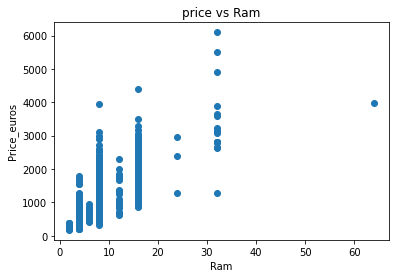

In [ ]:
# 램과 가격의 상관관계 시각화
p_correlation = X['Ram'].corr(y['Price_euros'])
print('correlation ',p_correlation)
print('\n')
plt.scatter(x=X['Ram'],y=y['Price_euros']);
plt.xlabel('Ram')
plt.ylabel('Price_euros') 
plt.title('price vs Ram')

# 램과 가격은 높은 상관관계를 보이고 있다.

# 노트북에는 대개 8~16기가 램을 쓴다. 
# 32기가 넘어가면 비싸진다.
# 64기가는 아웃라이어 일까? 검색해봤는데 400만원 대에 살수 있는 걸로 봐서 아닌듯  

In [ ]:
X['Ram'].sort_values() #64기가

1041     2.0
20       2.0
637      2.0
1282     2.0
346      2.0
        ... 
901     32.0
723     32.0
968     32.0
177     32.0
1066    64.0
Name: Ram, Length: 1303, dtype: float32

### 무게의 가격의 상관관계 시각화

correlation  0.2103698019683421




Text(0.5, 1.0, 'price vs Weight')

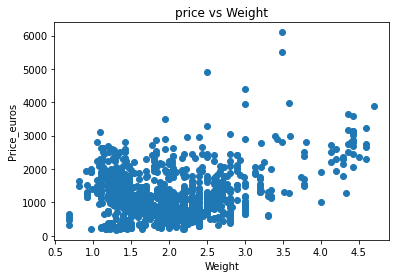

In [ ]:
p_correlation = X['Weight'].corr(y['Price_euros'])
print('correlation ',p_correlation)
print('\n')
plt.scatter(x=X['Weight'],y=y['Price_euros'])
plt.xlabel('Weight')
plt.ylabel('Price_euros') 
plt.title('price vs Weight')

# 무게와 가격은 낮은 상관관계를 보이고 있다. 가볍든무겁든 비싸다!!  

## Encording

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for column in X.columns:
  if is_numeric_dtype(X[column]): # X의 컬럼 타입을 정수형으로 바꿈
    continue
  X[column] = le.fit_transform(X[column]) # X 컬럼들을 라벨인코딩함 

In [ ]:
X.head()

# 문자로 돼 있던 속성들이 라벨인코더가 정한 임의의 규칙대로 숫자화 됐음 

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz,storage_device_type,storage_size_gb,screen_resoluton_height,screen_type,screen_resoluton_width
0,1,300,4,13.3,8.0,56,8,1.37,51,2.3,5,128.0,1600.0,12,2560.0
1,1,301,4,13.3,8.0,50,8,1.34,51,1.8,0,128.0,900.0,0,1440.0
2,7,50,3,15.6,8.0,52,4,1.86,57,2.5,5,256.0,1080.0,3,1920.0
3,1,300,4,15.4,16.0,8,8,1.83,65,2.7,5,512.0,1800.0,12,2880.0
4,1,300,4,13.3,8.0,57,8,1.37,51,3.1,5,256.0,1600.0,12,2560.0


In [ ]:
X.info() # 오브젝트 타입 없다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   int64  
 1   Product                  1303 non-null   int64  
 2   TypeName                 1303 non-null   int64  
 3   Inches                   1303 non-null   float64
 4   Ram                      1303 non-null   float32
 5   Gpu                      1303 non-null   int64  
 6   OpSys                    1303 non-null   int64  
 7   Weight                   1303 non-null   float32
 8   Cpu_core                 1303 non-null   int64  
 9   Processor_Speed_GHz      1303 non-null   float32
 10  storage_device_type      1303 non-null   int64  
 11  storage_size_gb          1303 non-null   float64
 12  screen_resoluton_height  1303 non-null   float32
 13  screen_type              1303 non-null   int64  
 14  screen_resoluton_width  

## scaling 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

In [ ]:
for column in X.columns:
  X[column] = mmscaler.fit_transform(X[[column]])
X.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz,storage_device_type,storage_size_gb,screen_resoluton_height,screen_type,screen_resoluton_width
0,0.055556,0.486224,0.8,0.385542,0.096774,0.533333,1.0,0.169576,0.554348,0.518519,0.454545,0.060241,0.597701,0.60,0.482619
1,0.055556,0.487844,0.8,0.385542,0.096774,0.476190,1.0,0.162095,0.554348,0.333333,0.000000,0.060241,0.094828,0.00,0.029911
2,0.388889,0.081037,0.6,0.662651,0.096774,0.495238,0.5,0.291771,0.619565,0.592593,0.454545,0.124498,0.224138,0.15,0.223929
3,0.055556,0.486224,0.8,0.638554,0.225806,0.076190,1.0,0.284289,0.706522,0.666667,0.454545,0.253012,0.741379,0.60,0.611964
4,0.055556,0.486224,0.8,0.385542,0.096774,0.542857,1.0,0.169576,0.554348,0.814815,0.454545,0.124498,0.597701,0.60,0.482619


In [ ]:
X.corr()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz,storage_device_type,storage_size_gb,screen_resoluton_height,screen_type,screen_resoluton_width
Company,1.000000,0.067234,-0.007718,-0.085784,0.046508,0.030332,0.134290,-0.129610,0.030874,0.140119,0.104251,-0.083812,0.053307,0.092757,0.056234
Product,0.067234,1.000000,0.065594,-0.218974,0.019916,0.103462,0.120562,-0.249029,0.147986,-0.047634,0.058152,-0.118650,0.162373,0.204854,0.162045
TypeName,-0.007718,0.065594,1.000000,-0.077428,-0.242862,-0.197440,0.085223,-0.267002,-0.123226,-0.088179,-0.197083,0.071694,-0.069762,-0.217631,-0.084792
Inches,-0.085784,-0.218974,-0.077428,1.000000,0.237993,0.198259,0.034528,0.827631,0.143806,0.307870,0.181533,0.269511,-0.095404,-0.282142,-0.071245
Ram,0.046508,0.019916,-0.242862,0.237993,1.000000,0.384675,0.139367,0.383874,0.449250,0.368000,0.478134,0.018271,0.424437,0.229333,0.433121
Gpu,0.030332,0.103462,-0.197440,0.198259,0.384675,1.000000,0.104784,0.318717,0.487841,0.287852,0.282848,-0.063581,0.222425,0.166366,0.232606
OpSys,0.134290,0.120562,0.085223,0.034528,0.139367,0.104784,1.000000,0.006480,0.105644,0.214938,0.259455,-0.046528,0.152991,0.075468,0.152301
Weight,-0.129610,-0.249029,-0.267002,0.827631,0.383874,0.318717,0.006480,1.000000,0.180944,0.320434,0.220744,0.179962,-0.053846,-0.156932,-0.032880
Cpu_core,0.030874,0.147986,-0.123226,0.143806,0.449250,0.487841,0.105644,0.180944,1.000000,0.231467,0.411885,-0.011700,0.304279,0.212364,0.314846
Processor_Speed_GHz,0.140119,-0.047634,-0.088179,0.307870,0.368000,0.287852,0.214938,0.320434,0.231467,1.000000,0.369684,0.066295,0.169668,0.037267,0.183548


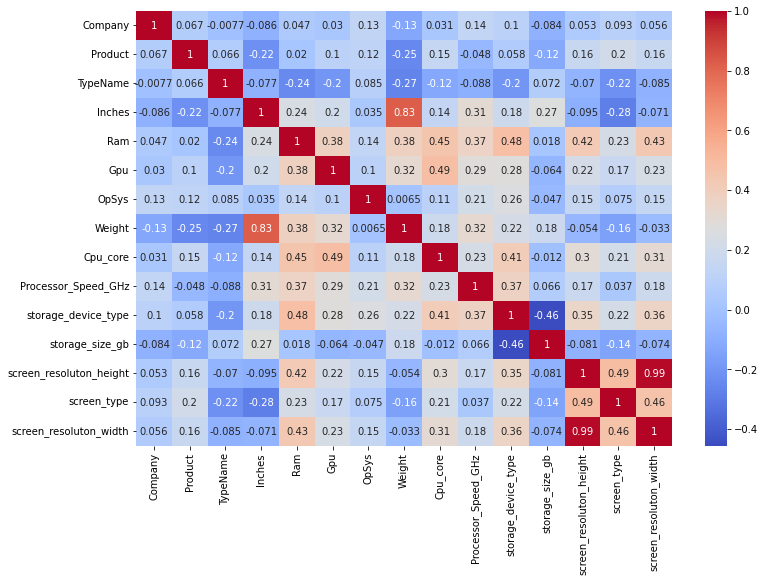

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data=X.corr(),annot=True,cmap='coolwarm')
plt.show()

# 인치랑 무게
# 화면 너비와 높이는 매우 높은 상관관계를 보임 

Text(0.5, 1.0, 'Distribution of Weight')

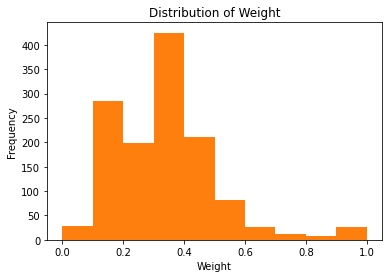

In [ ]:
plt.hist(X['Weight'])
plt.hist(X['Weight'])
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Weight")

Text(0.5, 1.0, 'Distribution of Company')

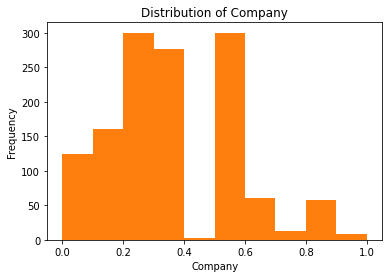

In [ ]:
plt.hist(X['Company'])
plt.hist(X['Company']);
plt.xlabel("Company")
plt.ylabel("Frequency")
plt.title("Distribution of Company")

Text(0.5, 1.0, 'Distribution of Cpu_Core')

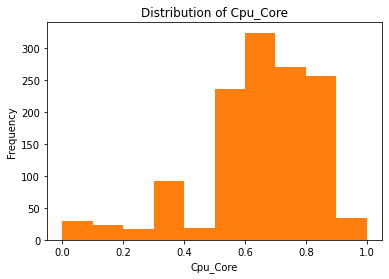

In [ ]:
plt.hist(X['Cpu_core'])
plt.hist(X['Cpu_core']);
plt.xlabel("Cpu_Core")
plt.ylabel("Frequency")
plt.title("Distribution of Cpu_Core")

Text(0.5, 1.0, 'Distribution of Ram')

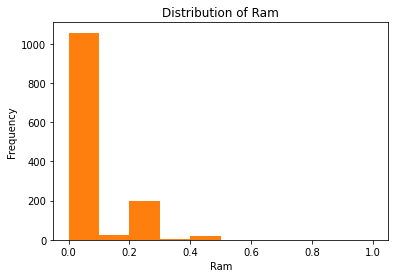

In [ ]:
plt.hist(X['Ram'])
plt.hist(X['Ram']);
plt.xlabel("Ram")
plt.ylabel("Frequency")
plt.title("Distribution of Ram")

## 피쳐 엔지니어링 하고 다시 모델링

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(
    X,y,test_size=.30, random_state=1
)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### 진화 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
lereg=LinearRegression()

lereg.fit(Xtrain,ytrain)
LePredict=lereg.predict(Xtest)
lereg_training_score=lereg.score(Xtrain,ytrain)
print("LinearRegression training score: ",lereg_training_score)
LR_Af_prepros_r2=r2_score(ytest,LePredict)
print("LR_Af_prepros r2_score:",LR_Af_prepros_r2)


LinearRegression training score:  0.7212967614238539
LR_Af_prepros r2_score: 0.7155438921091948


### 진화 knn 최근접이웃

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(Xtrain,ytrain)
knn_pred=knn.predict(Xtest)
knn_training_score=knn.score(Xtrain,ytrain)
print("KNN Regressor training score: " ,knn_training_score)
knn_Af_prepros_r2=r2_score(ytest,knn_pred)
print("KNN_Af_prepros_r2_score:",knn_Af_prepros_r2)

KNN Regressor training score:  0.8828599466456752
KNN_Af_prepros_r2_score: 0.7791693204344813


### 진화 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(Xtrain,ytrain)
RandomFR_Af_prepros_pred = RFR.predict(Xtest)
RFR_training_score = RFR.score(Xtrain,ytrain)
print("RFR_training_score",RFR_training_score)
RFR_Af_prepros_r2 = r2_score(ytest,RandomFR_Af_prepros_pred) 
print("RFR_Af_prepros_r2_score",RFR_Af_prepros_r2)

RFR_training_score 0.9765659701572236
RFR_Af_prepros_r2_score 0.869325238047164


### 진화 디시전트리

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0)

dtree.fit(Xtrain,ytrain)
dtree_Af_prepros_predict = dtree.predict(Xtest)
dtree_training_score = dtree.score(Xtrain,ytrain)
dtree_Af_prepros_r2 = r2_score(ytest,dtree_Af_prepros_predict)
print("dtree_training_score ",dtree_training_score )
print("dtree_Af_prepros_r2_score",dtree_Af_prepros_r2)


dtree_training_score  0.9483143774139171
dtree_Af_prepros_r2_score 0.7487657475030154


### 진화 서포트벡터

In [ ]:
from sklearn.svm import SVR
svr_lr = SVR(kernel='linear')
svr_lr.fit(Xtrain,ytrain)
svr_Af_prepros_pred = svr_lr.predict(Xtest)
svr_training_score = svr_lr.score(Xtrain,ytrain)
svr_Af_prepros_r2 = r2_score(ytest,svr_Af_prepros_pred)
print("svr_training_score",svr_training_score)
print("svr_Af_prepros_r2_score",svr_Af_prepros_r2)

svr_training_score 0.10018671781200161
svr_Af_prepros_r2_score 0.07534991370576893


### 진화 라쏘

In [ ]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(Xtrain,ytrain)
lassoReg_Af_prepros_predict = lassoReg.predict(Xtest)
lassoReg_training_score = lassoReg.score(Xtrain,ytrain)
lassoReg_Af_prepros_r2 = r2_score(ytest,lassoReg_Af_prepros_predict)
print("lassoReg_training_score",lassoReg_training_score)
print("lassoReg_Af_prepros_r2 ",lassoReg_Af_prepros_r2 )

lassoReg_training_score 0.7211062447702643
lassoReg_Af_prepros_r2  0.7160296401457347


### 진화 에이다부스트

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaBoost=AdaBoostRegressor(n_estimators=13,
    learning_rate=1.0,
    loss='linear',
    random_state=1)
adaBoost.fit(Xtrain,ytrain)
adaBoost_Af_prepros_predict = adaBoost.predict(Xtest)
adaBoost_training_score = adaBoost.score(Xtrain,ytrain)
adaBoost_Af_prepros_r2 = r2_score(ytest,adaBoost_Af_prepros_predict)
print("adaBoost_training_score",adaBoost_training_score)
print("adaBoost_Af_prepros_r2",adaBoost_Af_prepros_r2)

adaBoost_training_score 0.7563177390071645
adaBoost_Af_prepros_r2 0.6913588825306769


### 진화 xgb

In [ ]:
import xgboost as xg
xgb = xg.XGBRegressor(n_estimators=100,max_depth=100)
xgb.fit(Xtrain,ytrain)
xgb_Af_prepros_predict = xgb.predict(Xtest)
xgb_training_score = xgb.score(Xtrain,ytrain)
xgb_Af_prepros_r2 = r2_score(ytest,xgb_Af_prepros_predict)

print("xgb_training_score",xgb_training_score)
print("xgb_Af_prepros_r2",xgb_Af_prepros_r2)

[12:18:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb_training_score 0.9997610936130384
xgb_Af_prepros_r2 0.8620430145779638


### 진화 가우시안

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gaussianReg = GaussianProcessRegressor(kernel=kernel,normalize_y=True,random_state=1)
gaussianReg.fit(Xtrain,ytrain)
gaussianReg_Af_prepros_predict =gaussianReg.predict(Xtest)
gaussianReg_Af_prepros_training_score = gaussianReg.score(Xtrain,ytrain)
gaussianReg_Af_prepros_r2 = r2_score(ytest,gaussianReg_Af_prepros_predict)
print("gaussianReg_Af_prepros_training_score",gaussianReg_Af_prepros_training_score)
print("gaussianReg_Af_prepros_r2",gaussianReg_Af_prepros_r2)

gaussianReg_Af_prepros_training_score 0.7200812900985649
gaussianReg_Af_prepros_r2 0.7191663356465119


### 진화 lgb

In [ ]:
import lightgbm as lgb
lgb = lgb.LGBMRegressor(n_estimators=100,max_depth=100)
lgb.fit(Xtrain,ytrain)
lgb_Af_prepros_predict = lgb.predict(Xtest)
lgb_Af_prepros_training_score =lgb.score(Xtrain,ytrain)
lgb_Af_prepros_r2 =r2_score(ytest,lgb_Af_prepros_predict)
print("lgb_Af_prepros_training_score",lgb_Af_prepros_training_score)
print("lgb_Af_prepros_r2",lgb_Af_prepros_r2)


lgb_Af_prepros_training_score 0.9462223568073223
lgb_Af_prepros_r2 0.8477993137727525


## 전처리 모델링 시각화

In [ ]:
LR_DF_Af_prepros = pd.DataFrame({'Algorithm Name':['LREG r2 SCORE:','KNN R2 SCORE:','RFR R2 SCORE:','DTREE R2 SCORE:','SVR R2 SCORE:','LASSO R2 SCORE:','ADA R2 SCORE:','XGB R2 SCORE:','GAU R2 SCORE:','LGB R2 SCORE:'],
                                 'Accuracy Score_Af_prepros %': [LR_Af_prepros_r2*100,knn_Af_prepros_r2*100,
                                          RFR_Af_prepros_r2*100,dtree_Af_prepros_r2*100,
                                          svr_Af_prepros_r2*100,lassoReg_Af_prepros_r2*100,
                                          adaBoost_Af_prepros_r2*100,xgb_Af_prepros_r2*100,
                                          
                                          gaussianReg_Af_prepros_r2*100,lgb_Af_prepros_r2*100]
                                 })
LR_DF_Af_prepros

,Algorithm Name,Accuracy Score_Af_prepros %
0,LREG r2 SCORE:,71.554389
1,KNN R2 SCORE:,77.916932
2,RFR R2 SCORE:,86.932524
3,DTREE R2 SCORE:,74.876575
4,SVR R2 SCORE:,7.534991
5,LASSO R2 SCORE:,71.602964
6,ADA R2 SCORE:,69.135888
7,XGB R2 SCORE:,86.204301
8,GAU R2 SCORE:,71.916634
9,LGB R2 SCORE:,84.779931


In [ ]:
# 전처리 후 
LR_DF_Af_prepros.sort_values(by='Accuracy Score_Af_prepros %',ascending=False)

,Algorithm Name,Accuracy Score_Af_prepros %
2,RFR R2 SCORE:,86.932524
7,XGB R2 SCORE:,86.204301
9,LGB R2 SCORE:,84.779931
1,KNN R2 SCORE:,77.916932
3,DTREE R2 SCORE:,74.876575
8,GAU R2 SCORE:,71.916634
5,LASSO R2 SCORE:,71.602964
0,LREG r2 SCORE:,71.554389
6,ADA R2 SCORE:,69.135888
4,SVR R2 SCORE:,7.534991


In [ ]:
#전처리 전 
LR_DF.sort_values(by='Accuracy Score %', ascending=False)

,algorithm name,Accuracy Score %
7,xgboost r2 score,82.558224
2,randomforest r2 score:,82.236319
9,LightBoost r2 score,81.799851
1,knn r2 score:,72.995868
6,adaboost r2 score,65.632949
3,decisiontree r2 score,62.154999
0,lreg r2 score:,42.766063
5,lasso r2 score,42.765380
8,gaussian r2 score,42.746803
4,svr r2 score,36.804570


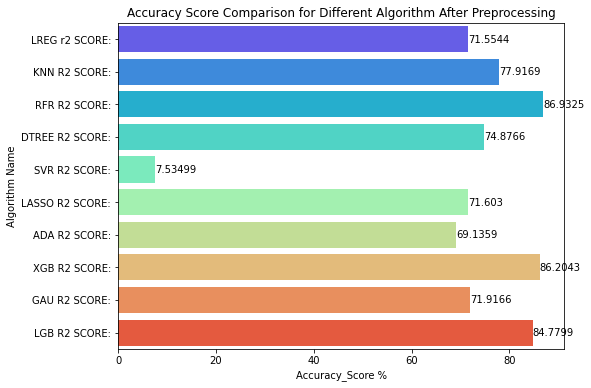

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.barplot(y='Algorithm Name',x='Accuracy Score_Af_prepros %',data=LR_DF_Af_prepros,palette='rainbow')
ax.set_xlabel("Accuracy_Score %")
ax.set_ylabel("Algorithm Name")
ax.set_title("Accuracy Score Comparison for Different Algorithm After Preprocessing")
ax.bar_label(ax.containers[0])
plt.show()

### TOP 3
1. 랜덤포레스트
1. XGB
1. LGB

* 선형회귀 라쏘 알고리즘은 전처리(특히 스케일링)를 잘하면 점수 상승폭이 크다.
* 부스팅 계열 알고리즘은 상승폭이 미미함 (전처리를 안해도 성능이 좋다!!!)

# 전처리 안한 XGB,LGB >>>>>>>>>> 전처리 한 선형,라쏘 etc..

# SelectKBest  일변량 통계로 피쳐 엔지니어링

* 최적의 변수선택을 도와주는 애임 
  * 성능이 높은(y값과 상관관계가 높다거나?) 애들을 찾아준다 

* 변수선택이 중요한 이유??
  * 불필요한 변수는 모델의 성능을 떨어트리기 때문에!! 

  

* 각각의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산, 계산 후 깊게 관련되어 있다고 판단되는 특성을 선택
* f_classif 분산분석(ANOVA) F검정 통계값

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
BestFeatures = SelectKBest(score_func = f_classif)
fit = BestFeatures.fit(X,y)


In [ ]:
df_scores = pd.DataFrame(fit.scores_)
df_scores

,0
0,1.261384
1,1.276879
2,1.091409
3,1.232001
4,4.571983
5,1.551459
6,1.687550
7,1.430084
8,1.732139
9,1.821851


In [ ]:
df_columns = pd.DataFrame(X.columns)
df_columns

,0
0,Company
1,Product
2,TypeName
3,Inches
4,Ram
5,Gpu
6,OpSys
7,Weight
8,Cpu_core
9,Processor_Speed_GHz


In [ ]:
feature_Scores = pd.concat([df_columns,df_scores],axis=1)
feature_Scores
feature_Scores.columns = ['Feature Name','score']

In [ ]:
feature_Scores

,Feature Name,score
0,Company,1.261384
1,Product,1.276879
2,TypeName,1.091409
3,Inches,1.232001
4,Ram,4.571983
5,Gpu,1.551459
6,OpSys,1.687550
7,Weight,1.430084
8,Cpu_core,1.732139
9,Processor_Speed_GHz,1.821851


In [ ]:
print(feature_Scores.nlargest(10,'score'))

               Feature Name     score
4                       Ram  4.571983
10      storage_device_type  2.107158
9       Processor_Speed_GHz  1.821851
8                  Cpu_core  1.732139
6                     OpSys  1.687550
13              screen_type  1.601360
14   screen_resoluton_width  1.580924
12  screen_resoluton_height  1.574601
5                       Gpu  1.551459
7                    Weight  1.430084


In [ ]:
top10F = feature_Scores.nlargest(10,'score') # nlargest 높은 순서대로 출력 score 상위 10개를 출력 
top10F


,Feature Name,score
4,Ram,4.571983
10,storage_device_type,2.107158
9,Processor_Speed_GHz,1.821851
8,Cpu_core,1.732139
6,OpSys,1.687550
13,screen_type,1.601360
14,screen_resoluton_width,1.580924
12,screen_resoluton_height,1.574601
5,Gpu,1.551459
7,Weight,1.430084


In [ ]:
top10FeatureName = list(top10F['Feature Name'])
top10FeatureName


['Ram',
 'storage_device_type',
 'Processor_Speed_GHz',
 'Cpu_core',
 'OpSys',
 'screen_type',
 'screen_resoluton_width',
 'screen_resoluton_height',
 'Gpu',
 'Weight']

In [ ]:
all_col = list(X.columns)
all_col

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'Gpu',
 'OpSys',
 'Weight',
 'Cpu_core',
 'Processor_Speed_GHz',
 'storage_device_type',
 'storage_size_gb',
 'screen_resoluton_height',
 'screen_type',
 'screen_resoluton_width']

In [ ]:
[i for i in all_col if i not in top10FeatureName] # all_col을 i에 바인딩 -> top10FeatureName 안에 없는 i 값을 출력 

['Company', 'Product', 'TypeName', 'Inches', 'storage_size_gb']

In [ ]:
X=X.drop([i for i in all_col if i not in top10FeatureName],axis=1)

In [ ]:
X.head()

,Ram,Gpu,OpSys,Weight,Cpu_core,Processor_Speed_GHz,storage_device_type,screen_resoluton_height,screen_type,screen_resoluton_width
0,0.096774,0.533333,1.0,0.169576,0.554348,0.518519,0.454545,0.597701,0.60,0.482619
1,0.096774,0.476190,1.0,0.162095,0.554348,0.333333,0.000000,0.094828,0.00,0.029911
2,0.096774,0.495238,0.5,0.291771,0.619565,0.592593,0.454545,0.224138,0.15,0.223929
3,0.225806,0.076190,1.0,0.284289,0.706522,0.666667,0.454545,0.741379,0.60,0.611964
4,0.096774,0.542857,1.0,0.169576,0.554348,0.814815,0.454545,0.597701,0.60,0.482619


## SelectKBEST로 피쳐 엔지니어링 한 데이터 모델링 및 시각화

In [ ]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X,y,test_size=.30, random_state=1)

In [ ]:
import xgboost as xg
xgb = xg.XGBRegressor(n_estimators=100,max_depth=100)
xgb.fit(xtrain1,ytrain1)
xgb_Af_Fselect_predict=xgb.predict(xtest1)
xgb_Af_Fselect_training_score=xgb.score(xtrain1,ytrain1)
print("xgb_Af_Fselect_training_score: ",xgb_Af_Fselect_training_score)
xgb_Af_Fselect_r2=r2_score(ytest,xgb_Af_Fselect_predict)
print("xgb_Af_Fselect_r2_score:",xgb_Af_Fselect_r2)


[13:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb_Af_Fselect_training_score:  0.9957085972042693
xgb_Af_Fselect_r2_score: 0.8296209477930042


In [ ]:
import lightgbm as lgb
lgb = lgb.LGBMRegressor(n_estimators=100,max_depth=100)
lgb.fit(xtrain1,ytrain1)
lgb_Af_Fselect_predict = lgb.predict(xtest1)
lgb_Af_Fselect_training_score =lgb.score(xtrain1,ytrain1)
lgb_Af_Fselect_r2 =r2_score(ytest1,lgb_Af_Fselect_predict)
print("lgb_Af_Fselect_training_score",lgb_Af_Fselect_training_score)
print("lgb_Af_Fselect_r2",lgb_Af_Fselect_r2)

lgb_Af_Fselect_training_score 0.922002077275988
lgb_Af_Fselect_r2 0.818432667460744


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(xtrain1,ytrain1)
RandomFR_Af_Fselect_predict = RFR.predict(xtest1)
RFR_Fselect_training_score = RFR.score(xtrain1,ytrain1)
print("RFR_Fselect_training_score",RFR_Fselect_training_score)
RFR_Af_Fselect_r2 = r2_score(ytest,RandomFR_Af_prepros_pred) 
print("RFR_Af_Fselect_r2 ",RFR_Af_Fselect_r2)

RFR_Fselect_training_score 0.9725696701868773
RFR_Af_Fselect_r2  0.8632091603060232


In [ ]:
LR_DF_Af_Fselect = pd.DataFrame({'Algorithm Name': ['RandomForest_r2_score:','XGBoost_r2_score',
                                         'lgb_r2_score'],
                      'Accuracy Score_Af_Fselect %': [
                                          RFR_Af_Fselect_r2*100,xgb_Af_Fselect_r2*100,
                                          lgb_Af_prepros_r2*100
                                          ]})
LR_DF_Af_Fselect

,Algorithm Name,Accuracy Score_Af_Fselect %
0,RandomForest_r2_score:,86.320916
1,XGBoost_r2_score,82.962095
2,lgb_r2_score,84.779931


In [ ]:
# selectKBest 사용
LR_DF_Af_Fselect.sort_values(by='Accuracy Score_Af_Fselect %',ascending=False)

In [ ]:
#  그냥 전처리만
LR_DF_Af_prepros.sort_values(by='Accuracy Score_Af_prepros %',ascending=False)

,Algorithm Name,Accuracy Score_Af_prepros %
2,RFR R2 SCORE:,86.932524
7,XGB R2 SCORE:,86.204301
9,LGB R2 SCORE:,84.779931
1,KNN R2 SCORE:,77.916932
3,DTREE R2 SCORE:,74.876575
8,GAU R2 SCORE:,71.916634
5,LASSO R2 SCORE:,71.602964
0,LREG r2 SCORE:,71.554389
6,ADA R2 SCORE:,69.135888
4,SVR R2 SCORE:,7.534991


In [ ]:
# 노말  
LR_DF.sort_values(by='Accuracy Score %', ascending=False)

,algorithm name,Accuracy Score %
7,xgboost r2 score,82.558224
2,randomforest r2 score:,82.236319
9,LightBoost r2 score,81.799851
1,knn r2 score:,72.995868
6,adaboost r2 score,65.632949
3,decisiontree r2 score,62.154999
0,lreg r2 score:,42.766063
5,lasso r2 score,42.765380
8,gaussian r2 score,42.746803
4,svr r2 score,36.804570


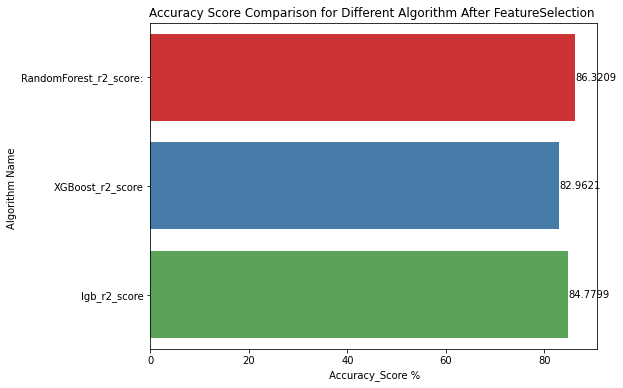

In [ ]:
plt.figure(figsize = (8, 6))
ax=sns.barplot(y='Algorithm Name',x='Accuracy Score_Af_Fselect %',data=LR_DF_Af_Fselect,palette='Set1')
#sns.set(rc = {'figure.figsize':(20, 20)})

ax.set_xlabel( " Accuracy_Score %")
ax.set_ylabel( "Algorithm Name ")
ax.set_title(  "Accuracy Score Comparison for Different Algorithm After FeatureSelection ")
ax.bar_label(ax.containers[0])  # show value
plt.show()